# Bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Análise Exploratória dos dados

In [2]:
caminho = r"C:\Users\User\Desktop\projetos\datasets\study_performance.csv"
dados = pd.read_csv(caminho)
dados

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
dados.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
dados.race_ethnicity.unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

Proporção entre homens e mulheres

In [5]:
dados["gender"].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

Parece que a escrita de male na coluna gender está com algum problema de espaçamento. Por isso vou remover todo e qualquer espaço que exista

In [6]:
dados["gender"] = dados["gender"].str.strip()
dados["gender"]

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

In [7]:
filtro_mulheres = dados[dados["gender"]=="female"]
quantidade_mulheres = filtro_mulheres["gender"].value_counts().get("female", 0)


In [8]:
filtro_homens = dados[dados["gender"]=="male"]
quantidade_homens = filtro_homens["gender"].value_counts().get("male", 0)


In [9]:
quantidade_homens

482

In [10]:
f"A quantidade de homens é de {quantidade_homens}"
f"A quantidade de mulheres é de {quantidade_mulheres}"

'A quantidade de mulheres é de 518'

### Gáfico de Pizza entre homens e mulheres

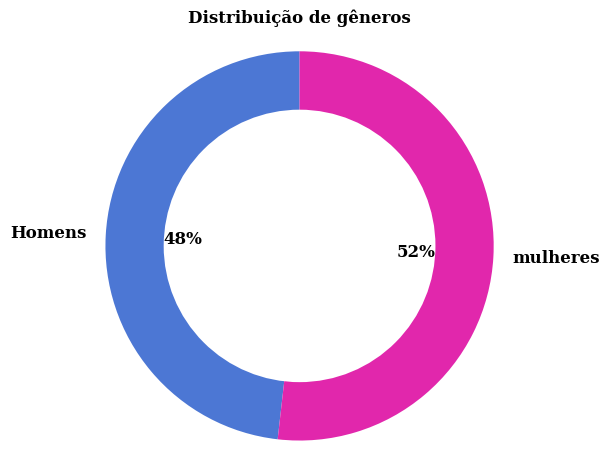

In [13]:
quantidades = [quantidade_homens, quantidade_mulheres]
labels = ["Homens", "mulheres"]
fonte_rotulos = {"fontsize": 12, "fontweight": "bold", "family": "serif"}
plt.title("Distribuição de gêneros", fontdict=fonte_rotulos)
cores = sns.color_palette("colorblind")
cores_personalizadas = ["#4C77D4", "#E127AC"]
plt.pie(quantidades, labels=labels, colors=cores_personalizadas, autopct="%.0f%%", textprops=fonte_rotulos, radius=1.0, startangle=90)
centro_do_circulo = plt.Circle((0,0),0.70,fc="white")
fig = plt.gcf()
fig.gca().add_artist(centro_do_circulo)
plt.axis("equal")
plt.tight_layout()
plt.show()

#### Tabela de frequência e percentual entre homens e mulheres

In [51]:
genero = pd.Series(["Homem", "Mulher"])
frequencia = pd.Series([quantidade_homens, quantidade_mulheres])

In [52]:
percentual_homens = quantidade_homens / (quantidade_homens + quantidade_mulheres) * 100
percentual_homens

48.199999999999996

In [53]:
percentual_mulheres = quantidade_mulheres / (quantidade_homens + quantidade_mulheres) * 100
percentual_mulheres

51.800000000000004

In [55]:
percentual = pd.Series([percentual_homens, percentual_mulheres])
type(percentual)

pandas.core.series.Series

In [56]:
data = {"Gênero": genero, "Quantidade": frequencia, "Percentual": percentual}

In [57]:
frequencia_homens_mulheres = pd.DataFrame(data)
frequencia_homens_mulheres

,Gênero,Quantidade,Percentual
0,Homem,482,48.2
1,Mulher,518,51.8


### Explorando a coluna de Etnia

In [59]:
dados.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [65]:
len(dados["race_ethnicity"].unique())

5

##### Existem 5 etnias diferentes, sendo elas A, B, C, D e E

### Distribuição das Etnias

In [72]:
bins = list(dados["race_ethnicity"].unique())
bins


['group B', 'group C', 'group A', 'group D', 'group E']

In [75]:
frequencia = pd.Series.value_counts(dados["race_ethnicity"])
frequencia

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [77]:
percentual = pd.Series.value_counts(dados["race_ethnicity"], normalize=True)
percentual

race_ethnicity
group C    0.319
group D    0.262
group B    0.190
group E    0.140
group A    0.089
Name: proportion, dtype: float64

In [81]:
classes_etnias = bins
bins

['group B', 'group C', 'group A', 'group D', 'group E']